In [66]:
from src.detector.data_obj_detect import MOT16ObjDetect
from src.detector.utils import obj_detect_transforms, visualize_detection
from src.detector.object_detector import init_detector

import torchvision
import torch
import json
import numpy as np
import matplotlib.pyplot as plt



In [67]:
detector_config_path = "config/obj_detect/maskrcnn_mask_nms.json"
obj_detect = init_detector(**json.load(open(detector_config_path, "r")))

In [68]:
ds = MOT16ObjDetect("data/MOT16",
        "train",
        sparse_version=False,
        transforms=obj_detect_transforms(train=False),
        vis_threshold=0.0,
        segmentation=False,
        only_obj_w_mask=True)

In [69]:
obj_detect.eval()

with torch.no_grad():
    image, target = ds[0]
    det = obj_detect([image])[0]


boxes = det["boxes"]
masks = det["masks"].squeeze(1)
labels = det["labels"]
scores = det["scores"]

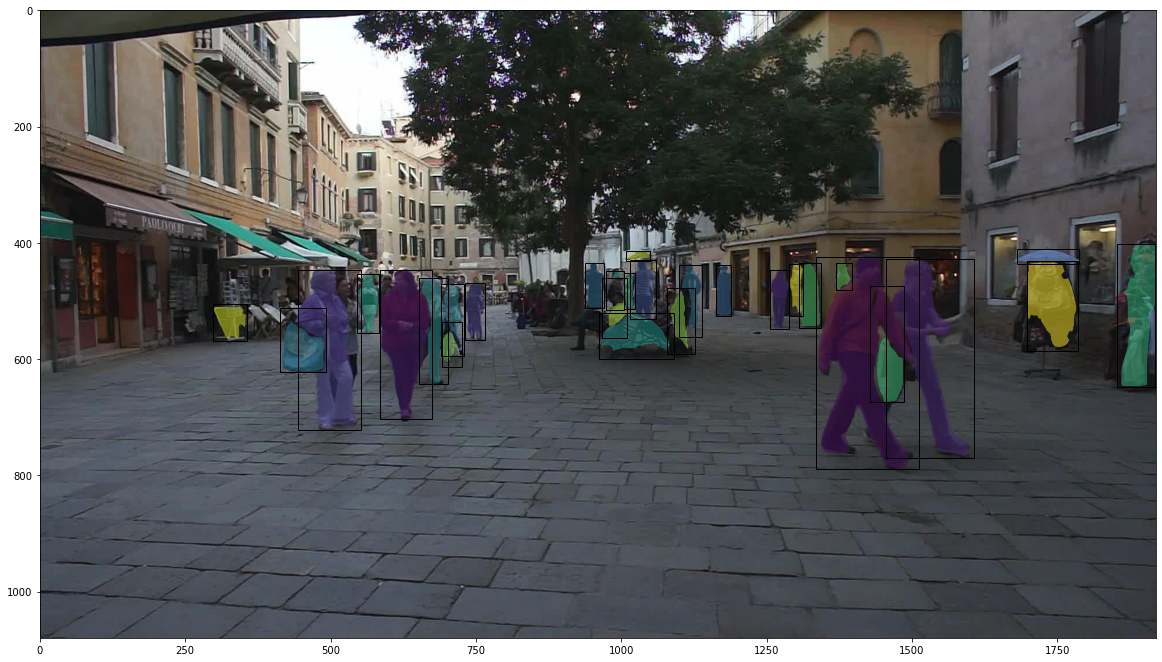

In [71]:
visualize_detection(image, det);